#### Importing libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from numpy import expand_dims
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator

#### Reading the Image

In [3]:
image = cv2.imread(r'C:\Users\ramit\OneDrive\Desktop\input.jpg')
image

array([[[150, 139, 142],
        [149, 138, 141],
        [149, 138, 141],
        ...,
        [119, 137, 160],
        [120, 138, 161],
        [120, 138, 161]],

       [[149, 138, 141],
        [149, 138, 141],
        [149, 138, 141],
        ...,
        [120, 138, 161],
        [121, 139, 162],
        [121, 139, 162]],

       [[149, 138, 141],
        [149, 138, 141],
        [150, 139, 142],
        ...,
        [120, 138, 161],
        [121, 139, 162],
        [123, 141, 164]],

       ...,

       [[ 58, 130,  87],
        [ 54, 126,  83],
        [ 50, 122,  79],
        ...,
        [ 23,  93,  52],
        [ 24,  94,  53],
        [ 25,  95,  54]],

       [[ 60, 131,  88],
        [ 57, 128,  85],
        [ 53, 124,  81],
        ...,
        [ 25,  92,  53],
        [ 26,  93,  54],
        [ 24,  94,  54]],

       [[ 61, 132,  89],
        [ 58, 129,  86],
        [ 56, 127,  84],
        ...,
        [ 25,  92,  53],
        [ 24,  91,  52],
        [ 22,  92,  52]]

In [4]:
image.shape

(1843, 2765, 3)

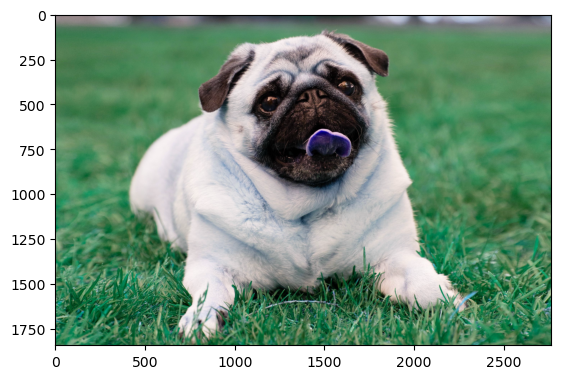

In [6]:
plt.imshow(image)
plt.show()

Text(0.5, 0.98, 'Original & RGB image channels')

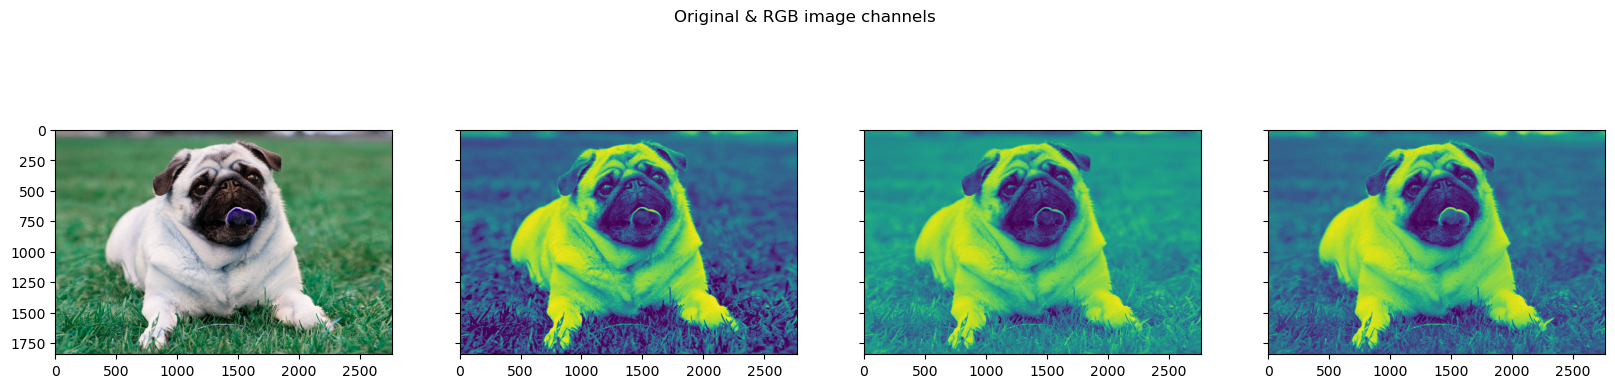

In [12]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

#### Converting to gray scale

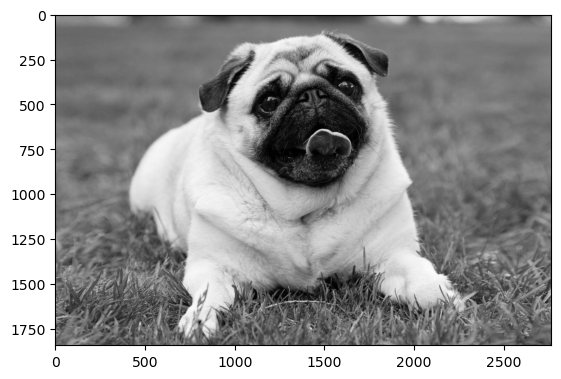

In [14]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap = 'gray')

#### Normalisation

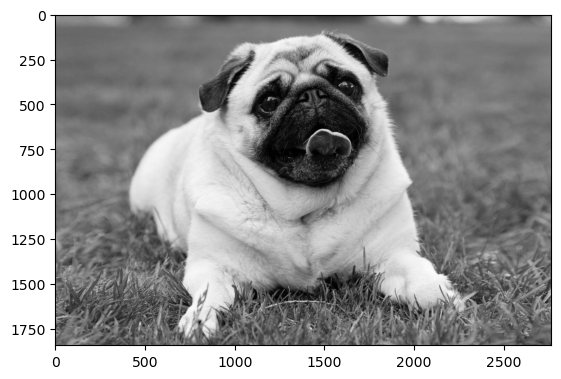

In [16]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image,cmap="gray")

#### Data Augmentation

#### Shifting

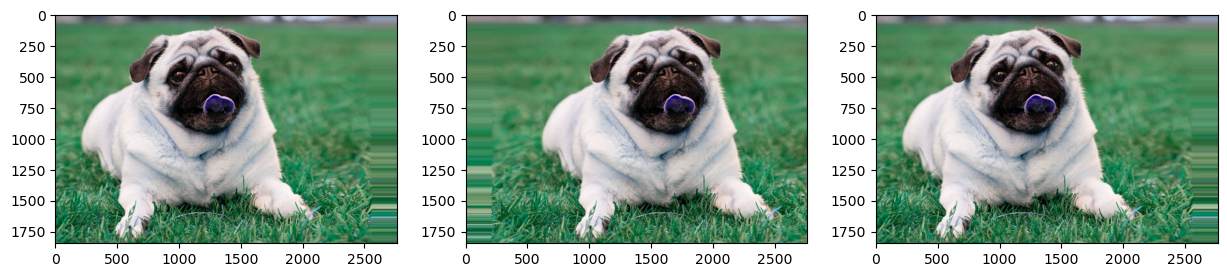

In [21]:
# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

#### Flipping

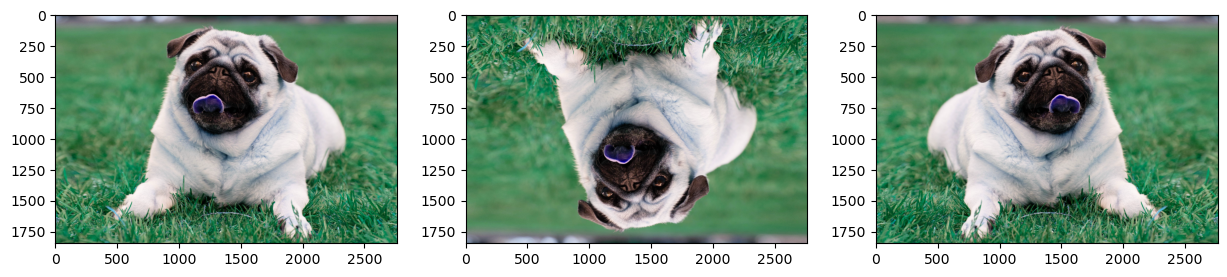

In [22]:
# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):
    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

#### Rotation

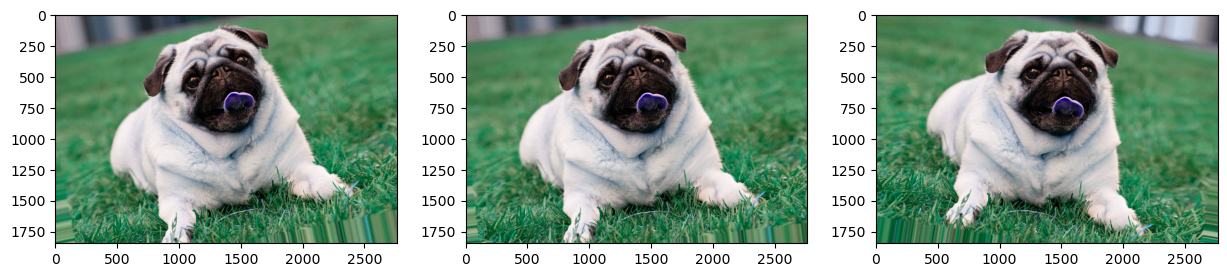

In [23]:
# ImageDataGenerator for rotation
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 


#### Changing brightness

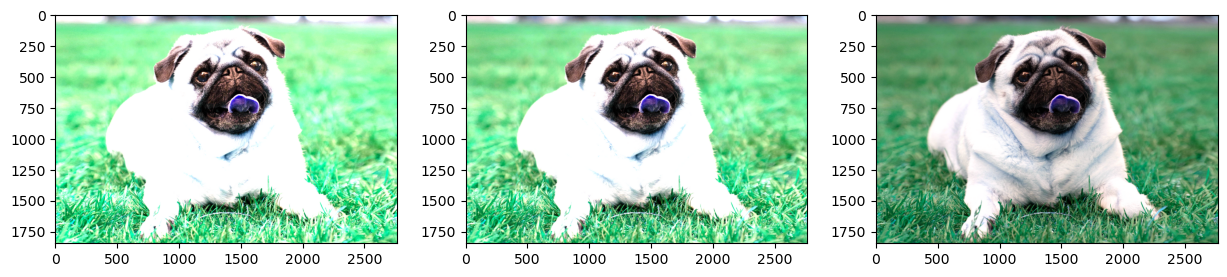

In [24]:
# ImageDataGenerator for brightness
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

#### Standardisation

C:\Users\ramit\anaconda\Lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\ramit\anaconda\Lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


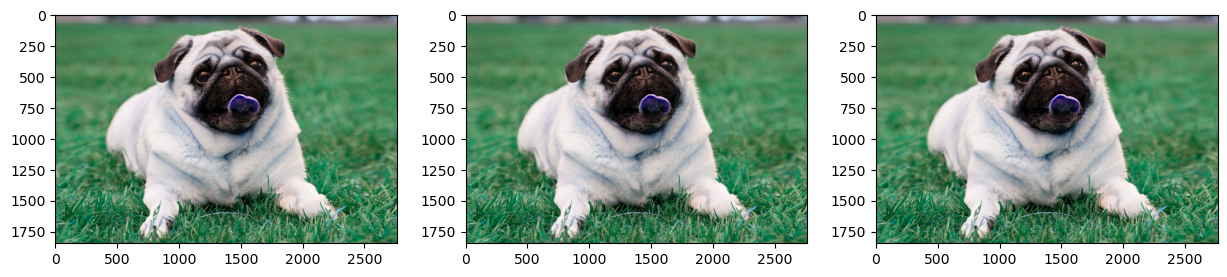

In [25]:
# creating the image data generator to standardize images
datagen = ImageDataGenerator(featurewise_center =True,
      featurewise_std_normalization = True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 